# predicting the sale price of bulldozer using ML

in this notebook, we're going to go through example machine learning project with the goal of predicting the sale price of bulldozer

## 1. Problem Definition 
> how well can we predict the future sale price of a bulldozer, given its characterics and previous examplees of how much similar bulldozer have been sold for

## 2. Data

- Train.csv is the training set, which contains data through the end of 2011.
- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

for more on the evaluation of this project check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.


## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets:

https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

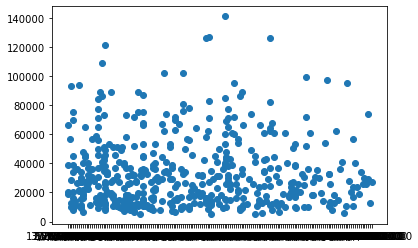

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:500], df['SalePrice'][:500])

In [6]:
df.saledate[:500]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
495     10/4/2007 0:00
496     8/13/2009 0:00
497      8/5/2010 0:00
498      6/2/2011 0:00
499     5/19/2011 0:00
Name: saledate, Length: 500, dtype: object

<AxesSubplot:ylabel='Frequency'>

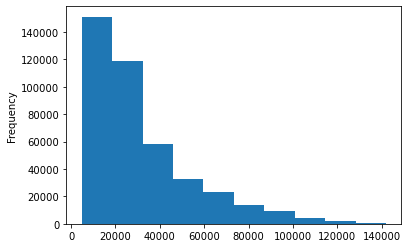

In [7]:
df.SalePrice.plot.hist()

# Parsing dates
When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.


In [8]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False,
                parse_dates=['saledate'])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

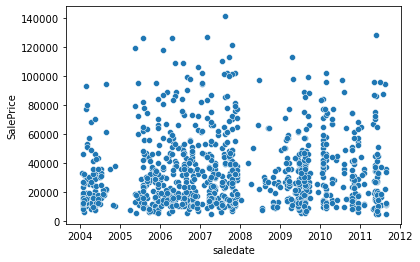

In [10]:
fig, ax = plt.subplots()

sns.scatterplot(x=df['saledate'][:1000], y=df["SalePrice"][:1000])

In [11]:
df.head(2).T

,0,1
SalesID,1139246,1139248
SalePrice,66000,57000
MachineID,999089,117657
ModelID,3157,77
datasource,121,121
auctioneerID,3,3
YearMade,2004,1996
MachineHoursCurrentMeter,68,4640
UsageBand,Low,Low
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00


In [12]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## Sort DataFrame by saledate
When working with time series data, it's a good idea to sort it by date.

In [13]:
df.sort_values(by=['saledate'], inplace = True, ascending=True)

In [14]:
df.saledate.head(200)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
239451   1989-02-01
167548   1989-02-01
235772   1989-02-01
235744   1989-02-01
52561    1989-02-01
Name: saledate, Length: 200, dtype: datetime64[ns]

In [15]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [16]:
df_tmp.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [17]:
df_tmp["sale_year"] = df_tmp.saledate.dt.year 
df_tmp['sale_month'] = df_tmp.saledate.dt.month
df_tmp['sale_day'] = df_tmp.saledate.dt.day
df_tmp['sale_day_of_week'] = df_tmp.saledate.dt.dayofweek
df_tmp['sale_day_of_year'] = df_tmp.saledate.dt.dayofyear

# dropping the original saledate
df_tmp.drop('saledate', axis = 1, inplace=True)

In [18]:
df_tmp.head(3).T

,205615,274835,141296
SalesID,1646770,1821514,1505138
SalePrice,9500,14000,50000
MachineID,1126363,1194089,1473654
ModelID,8434,10150,4139
datasource,132,132,132
auctioneerID,18,99,99
YearMade,1974,1980,1978
MachineHoursCurrentMeter,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G


In [19]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [21]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [22]:
pd.api.types.is_string_dtype(df_tmp['fiModelDesc'])
# checking whether the column is a string 
# https://pandas.pydata.org/pandas-docs/stable/reference/index.html

True

In [23]:
df_tmp.keys()

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'sale_year', 'sale_month',
       'sale_day', 'sale_day_of_week', 'sale_day_of_year'],
  

In [24]:
for key, values in df_tmp.items():
    print(f'This is the key: {key}\n') # the column name
    print(f'this is the values: {values}') #values are value_counts

This is the key: SalesID

this is the values: 205615    1646770
274835    1821514
141296    1505138
212552    1671174
62755     1329056
           ...   
410879    6302984
412476    6324811
411927    6313029
407124    6266251
409203    6283635
Name: SalesID, Length: 412698, dtype: int64
This is the key: SalePrice

this is the values: 205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
410879    16000.0
412476     6000.0
411927    16000.0
407124    55000.0
409203    34000.0
Name: SalePrice, Length: 412698, dtype: float64
This is the key: MachineID

this is the values: 205615    1126363
274835    1194089
141296    1473654
212552    1327630
62755     1336053
           ...   
410879    1915521
412476    1919104
411927    1918416
407124     509560
409203    1869284
Name: MachineID, Length: 412698, dtype: int64
This is the key: ModelID

this is the values: 205615     8434
274835    10150
141296     4139
212552     8591
62755      4089


In [25]:
for key, values in df_tmp.items():
    if pd.api.types.is_string_dtype(values):
        print(key)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [26]:
for key, values in df_tmp.items():
    if pd.api.types.is_string_dtype(values):
        df_tmp[key] = values.astype("category").cat.as_ordered()

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [28]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
100*(df_tmp.isnull().sum()/len(df_tmp))

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [30]:
df_tmp.to_csv('data/train_tmp.csv', index = False)

In [31]:
df_tmp = pd.read_csv('data/train_tmp.csv', low_memory=False)
df_tmp.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sale_year,sale_month,sale_day,sale_day_of_week,sale_day_of_year
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31


In [32]:
for key, values in df_tmp.items():
    if pd.api.types.is_numeric_dtype(values):
        print(key)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
sale_year
sale_month
sale_day
sale_day_of_week
sale_day_of_year


In [33]:
for key, values in df_tmp.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            print(key)

auctioneerID
MachineHoursCurrentMeter


In [34]:
for key, values in df_tmp.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            # add a binary column which tells if the data was missing or not
            df_tmp[key+"_is_missing"] = pd.isnull(values)
            # fill missing numeric values with median since it's more robust than the mean
            df_tmp[key] = values.fillna(values.median())

In [35]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [36]:
# let's double check if we have any missing value 
for key, values in df_tmp.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            print(key)

# filling the categorical values and turning into numbers

In [37]:
for key, values in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(values):
        print(key)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
for key, values in df_tmp.items():
    # check columns which * are not* numeric
    if not pd.api.types.is_numeric_dtype(values):
        # adding a binary column for the missing values 
        df_tmp[key+'_is_missing'] = pd.isnull(values) # true or false
        # we add the +1 because pandas encodes missing categories as -1
        df_tmp[key] = pd.Categorical(values).codes+1
        # if the column was null it would be assign -1 and we do not want that

In [39]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [40]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [41]:
df_tmp.head(3).T

,0,1,2
SalesID,1646770,1821514,1505138
SalePrice,9500,14000,50000
MachineID,1126363,1194089,1473654
ModelID,8434,10150,4139
datasource,132,132,132
...,...,...,...
Backhoe_Mounting_is_missing,False,True,False
Blade_Type_is_missing,False,True,False
Travel_Controls_is_missing,False,True,False
Differential_Type_is_missing,True,False,True


In [42]:
df_tmp.UsageBand.value_counts()

0    339028
3     35832
2     25311
1     12527
Name: UsageBand, dtype: int64

# building a model

In [43]:
%%time 
# instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

#fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

Wall time: 2min 11s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [44]:
len(df_tmp)

412698

In [45]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9875468079970562

# metric is not reliable 

#### splitting data into train/valud sets


In [46]:
df_tmp.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


- Training = all samples up until 2011
- Valid = all samples form January 1, 2012 - April 30, 2012
- Test = all samples from May 1, 2012 - November 2012

In [47]:
df_tmp['sale_year'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: sale_year, dtype: int64

Training = all samples up until 2011
Valid = all samples form January 1, 2012 - April 30, 2012
Test = all samples from May 1, 2012 - November 2012

In [48]:
df_valid_data = df_tmp[df_tmp['sale_year'] == 2012]
df_train_data = df_tmp[df_tmp['sale_year'] != 2012]

len(df_valid_data), len(df_train_data)

(11573, 401125)

In [49]:
# splitting data into X, and y

X_train, y_train = df_train_data.drop("SalePrice", axis=1), df_train_data.SalePrice
X_valid, y_valid = df_valid_data.drop("SalePrice", axis=1), df_valid_data.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [50]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

# building an evaluation function

The model will be scored on RMSLE (ratio is more important than the difference)


In [51]:
#creating an evaluation function (RSMLE (root mean square Log error))

from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def RMSLE(y_test, y_preds):
    '''
    calculates root mean squared log error between predictions and true labels.
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# create function to evalutate the model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid) 
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        'Training RMSLE': RMSLE(y_train, train_preds),
        'Valid RMSLE': RMSLE(y_valid, val_preds),
        'Training R^2': model.score(X_train, y_train),
        'valid R^2': model.score(X_valid, y_valid)
    }
    
    return scores

# let's test on smaller samples 

In [52]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                             max_samples=10000, random_state=42)

model.fit(X_train, y_train)

Wall time: 5.86 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [53]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'valid R^2': 0.8320374995090507}

%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(X_train, y_train)

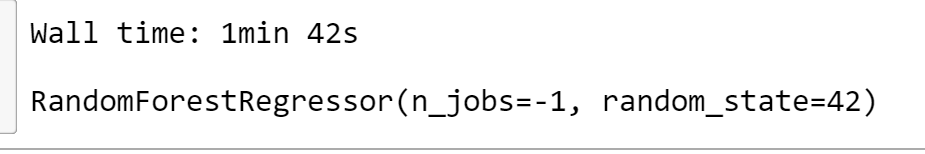

show_scores(model)
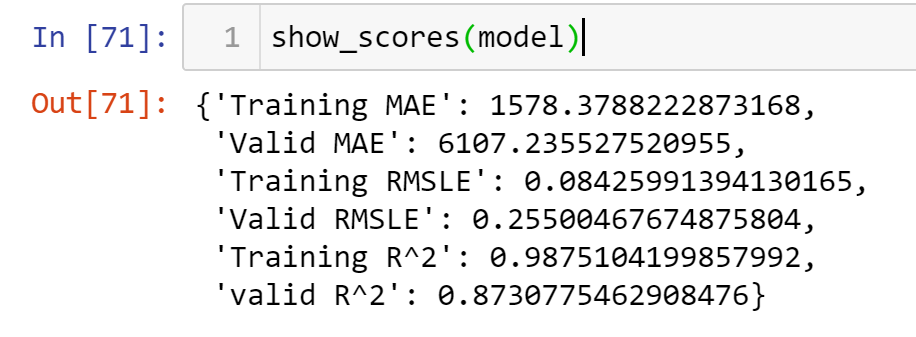

# hyperparameters tuning 

In [54]:
model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [55]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different hyperparameters 
rf_grid = {
    "n_estimators": np.arange(10,100,10),
    "max_depth":  [None, 3, 5, 10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1,20,2),
    'max_features': [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(),
                             param_distributions= rf_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True,
                             random_state=42 
                             )

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.0min finished


Wall time: 6min 12s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [56]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [57]:
show_scores(rs_model)

{'Training MAE': 5625.770084636958,
 'Valid MAE': 7211.668573403613,
 'Training RMSLE': 0.25982199717736687,
 'Valid RMSLE': 0.2951171845113766,
 'Training R^2': 0.8573226583535652,
 'valid R^2': 0.8302850651733387}

# training a model with the best parameters

# Note: those were found after 100 iterations of 'randomizedsearchCV'

In [58]:
# most ideal hyperparamteres

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_split=14,
                                   min_samples_leaf=1,
                                   max_samples=None,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   random_state=42)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [59]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'valid R^2': 0.8818019502450094}

In [60]:
%%time
#fast model

fast_model = RandomForestRegressor(n_estimators=50,
                                  min_samples_leaf=3,
                                  max_features=0.5,
                                  n_jobs=-1)

fast_model.fit(X_train, y_train)

Wall time: 32.8 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=50,
                      n_jobs=-1)

In [61]:
show_scores(fast_model)

{'Training MAE': 2534.1420782988685,
 'Valid MAE': 5932.319635621431,
 'Training RMSLE': 0.12904287857380028,
 'Valid RMSLE': 0.2437853409524212,
 'Training R^2': 0.9673576983022488,
 'valid R^2': 0.8811672734757156}

### let's predict on test data

In [62]:
df_test = pd.read_csv('data/Test.csv', parse_dates=["saledate"])

df_test.head(4)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN


model.predict(df_test)

# we have to preprocess the data to fit our other data

### training date must == test data

In [63]:
def preprocess_data(df):
    # ADD date time parameteres for saldate
    df["sale_year"] = df.saledate.dt.year 
    df['sale_month'] = df.saledate.dt.month
    df['sale_day'] = df.saledate.dt.day
    df['sale_day_of_week'] = df.saledate.dt.dayofweek
    df['sale_day_of_year'] = df.saledate.dt.dayofyear
    
    #drop original saledate
    df.drop('saledate', axis=1, inplace = True)
    
    # fill numeric row with the median
    for key, values in df.items():
        if pd.api.types.is_numeric_dtype(values):
            if pd.isnull(values).sum():
                # add a binary column which tells if the data was missing or not
                df[key+'_is_missing'] = pd.isnull(values)
                # fill missing numeric values with median since it's more robust than the mean
                df[key] = values.fillna(values.median())
                
                
                
        if not pd.api.types.is_numeric_dtype(values):
            # adding a binary column for the missing values 
            df[key+'_is_missing'] = pd.isnull(values) # true or false
            # we add the +1 because pandas encodes missing categories as -1
            df[key] = pd.Categorical(values).codes+1
            # if the column was null it would be assign -1 and we do not want that
        
    return df

In [64]:
df_test = preprocess_data(df_test)
df_test.head(2)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False


In [65]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [66]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [67]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [68]:
test_preds = ideal_model.predict(df_test)

In [69]:
df_preds = pd.DataFrame()

In [70]:
df_preds["salesID"] = df_test["SalesID"]
df_preds["salePrice"] = test_preds
df_preds

,salesID,salePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [71]:
# export to csv..

df_preds.to_csv('data/predictions.csv', index=False)

#  feature importance

In [72]:
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [73]:
len(X_train.columns), len(ideal_model.feature_importances_)

(102, 102)

In [74]:
import seaborn as sns

def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importance': importance                 
                      })
    .sort_values('feature_importance', ascending=False)
    .reset_index(drop=True))
    
    sns.barplot(x='feature_importance',
               y='features',
               data=df[:n],
               orient='h')

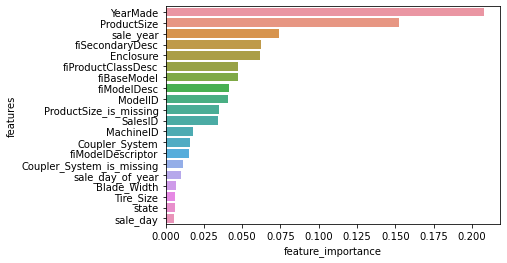

In [75]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [76]:
sum(ideal_model.feature_importances_)

1.0000000000000002

In [77]:
df.ProductSize.value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [78]:
df.Turbocharged.value_counts()

None or Unspecified    77111
Yes                     3985
Name: Turbocharged, dtype: int64

In [79]:
df.Enclosure.value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64